In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
greendata = []
for i in range(1,10):
    x = 'green/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        greendata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'green/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        greendata.append(cv2.imread(x))
    except:
         pass
for i in range(100,200):
    x = 'green/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        greendata.append(cv2.imread(x))
    except:
         pass
greendata = np.array(greendata)

reddata = []
for i in range(1,10):
    x = 'red/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        reddata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'red/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        reddata.append(cv2.imread(x))
    except:
         pass
for i in range(100,200):
    x = 'red/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        reddata.append(cv2.imread(x))
    except:
         pass
reddata = np.array(reddata)

redcardata = []
for i in range(1,10):
    x = 'red_car/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        redcardata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'red_car/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        redcardata.append(cv2.imread(x))
    except:
         pass
for i in range(100,200):
    x = 'red_car/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        redcardata.append(cv2.imread(x))
    except:
         pass
redcardata = np.array(redcardata)

greencardata = []
for i in range(1,10):
    x = 'green_car/0000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        greencardata.append(cv2.imread(x))
    except:
        pass
for i in range(10,100):
    x = 'green_car/000000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x)); 
        assert cv2.imread(x).shape == (100,100,3)
        greencardata.append(cv2.imread(x))
    except:
         pass
for i in range(100,200):
    x = 'green_car/00000'+str(i)+".jpg"
    try:
        plt.imshow(cv2.imread(x));
        assert cv2.imread(x).shape == (100,100,3)
        greencardata.append(cv2.imread(x))
    except:
         pass
greencardata = np.array(greencardata)
print(reddata.shape)
print(greendata.shape)
print(redcardata.shape)
print(greencardata.shape)

(173, 100, 100, 3)
(186, 100, 100, 3)
(165, 100, 100, 3)
(170, 100, 100, 3)


In [2]:
import numpy as np
def same_shuffle(arr1,arr2):
    size = arr2.size
    print(size)
    idxs = np.arange(size)
    np.random.shuffle(idxs)
    return arr1[idxs], arr2[idxs]

In [3]:
greenlist = list(greendata)
redlist = list(reddata)
greencarlist = list(greencardata)
redcarlist = list(redcardata)
datalist = greenlist*5+ redlist*5
# datalist = greenlist + redlist
data = np.array(datalist)

In [4]:
y_green = np.zeros(186*5)
y_red = np.zeros(173*5)+1
y_green_list = list(y_green)
y_red_list = list(y_red)
y_list = y_green_list + y_red_list
y = np.array(y_list)
print(data.shape)
data, y = same_shuffle(data, y)

(1795, 100, 100, 3)
1795


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [6]:
data_test = data[1400:]
data = data[:1400]
y_test = y[1400:]
y = y[:1400]

In [7]:
# Change these values
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 16)        4624      
_________________________________________________________________
flatten (Flatten)            (None, 7056)              0         
_________________________________________________________________
dropout (Dropout)            (None, 7056)              0

In [8]:
history = model.fit(data, y, epochs=15,validation_data=(data_test,y_test))

Train on 1400 samples, validate on 395 samples
Epoch 1/15
1400/1400 [==============================] - 11s 8ms/sample - loss: 1.4023 - accuracy: 0.5329 - val_loss: 0.6421 - val_accuracy: 0.6203
Epoch 2/15
1400/1400 [==============================] - 10s 7ms/sample - loss: 0.5792 - accuracy: 0.6543 - val_loss: 0.4464 - val_accuracy: 0.8025
Epoch 3/15
1400/1400 [==============================] - 10s 7ms/sample - loss: 0.4493 - accuracy: 0.7686 - val_loss: 0.2923 - val_accuracy: 0.8886
Epoch 4/15
1400/1400 [==============================] - 10s 7ms/sample - loss: 0.3642 - accuracy: 0.8407 - val_loss: 0.2511 - val_accuracy: 0.9063
Epoch 5/15
1400/1400 [==============================] - 10s 7ms/sample - loss: 0.2920 - accuracy: 0.8750 - val_loss: 0.1794 - val_accuracy: 0.9342
Epoch 6/15
1400/1400 [==============================] - 10s 7ms/sample - loss: 0.2091 - accuracy: 0.9086 - val_loss: 0.1629 - val_accuracy: 0.9443
Epoch 7/15
1400/1400 [==============================] - 10s 7ms/sample 

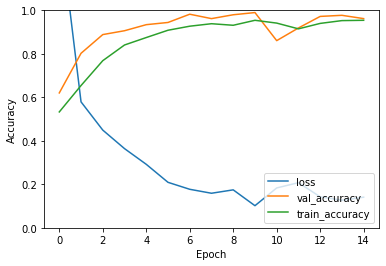

In [9]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [10]:
print(model.evaluate(data_test,y_test))

395/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [11]:
pred = model.predict(tf.cast(np.array([data[0],data[7]]),tf.float32))
k = []
for j in pred:
    k.append(j.argmax())
print("predicted:",k)
print("real: ",y[0],y[7])

predicted: [0, 1]
real:  0.0 1.0


In [12]:
x = np.arange(100).reshape(10,10)

In [13]:
import tensorflow.lite as tflite

In [14]:
model.save('nn.h5')

In [15]:
model2 = tf.keras.models.load_model('nn.h5')

In [16]:
print(model2.predict(tf.cast(np.array([data[0],data[6]]),tf.float32)))
print(y[0],y[6])

[[9.2978269e-01 7.0217386e-02]
 [1.0000000e+00 4.4991888e-18]]
0.0 0.0
